In [1]:
import pyaudio
import wave

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

/home/scarlet/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/scarlet/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/scarlet/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/scarlet/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:5

In [8]:
from keras import regularizers

import os

In [26]:
mylist= os.listdir("/home/scarlet/Projects/Data Science/Resources/Audio/Raw Files")

In [23]:
# len(mylist)

In [24]:
# len(mylist[0])

In [28]:
data, sampling_rate = librosa.load('/home/scarlet/Projects/Data Science/Resources/Audio/Raw Files/03-02-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


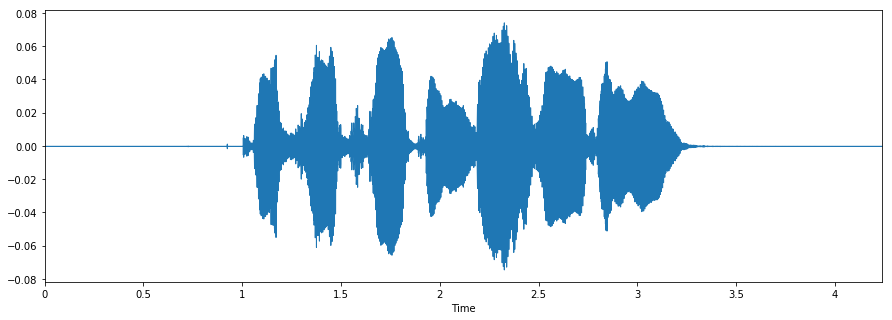

In [13]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

/home/scarlet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


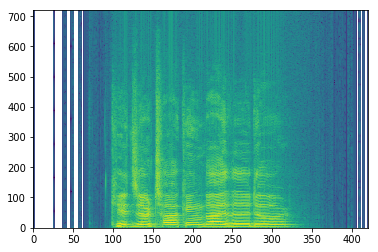

In [14]:

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('/home/scarlet/Projects/Data Science/Resources/Audio/RawFiles/03-02-01-01-01-01-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [15]:
'03-02-01-01-01-01-01.wav'[6:-16]

'01'

In [29]:
mylist

['03-01-02-02-01-02-02.wav',
 '03-02-05-01-02-02-16.wav',
 '03-01-05-02-02-02-04.wav',
 '03-01-04-02-02-01-13.wav',
 '03-01-08-02-02-02-06.wav',
 '03-01-04-02-02-01-09.wav',
 '03-01-06-02-02-02-12.wav',
 '03-01-01-01-02-01-13.wav',
 '03-02-02-02-01-02-21.wav',
 '03-02-06-01-01-02-21.wav',
 '03-02-03-02-01-02-19.wav',
 '03-01-05-01-02-02-23.wav',
 '03-01-01-01-01-02-13.wav',
 '03-02-02-01-01-01-13.wav',
 '03-01-07-02-01-02-15.wav',
 '03-02-06-02-01-01-12.wav',
 '03-01-06-02-01-02-05.wav',
 '03-01-06-01-02-01-03.wav',
 '03-02-03-02-02-01-05.wav',
 '03-01-01-01-01-01-06.wav',
 '03-01-04-02-02-02-12.wav',
 '03-01-07-02-02-02-19.wav',
 '03-01-05-02-02-01-21.wav',
 '03-02-03-01-01-02-06.wav',
 '03-02-04-01-01-01-12.wav',
 '03-02-05-02-01-02-03.wav',
 '03-01-01-01-01-02-17.wav',
 '03-02-03-01-01-01-03.wav',
 '03-02-05-02-01-02-22.wav',
 '03-01-08-01-02-02-16.wav',
 '03-01-06-02-01-01-13.wav',
 '03-01-06-01-02-02-09.wav',
 '03-01-03-01-01-02-09.wav',
 '03-01-06-02-02-01-19.wav',
 '03-02-06-01-

In [30]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [31]:
labels = pd.DataFrame(feeling_list)

In [32]:
labels[:10]

,0
0,female_calm
1,female_angry
2,female_angry
3,male_sad
4,male_sad
5,female_fearful
6,male_calm
7,male_fearful
8,male_happy
9,male_angry


In [35]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('/home/scarlet/Projects/Data Science/Resources/Audio/Raw Files/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [36]:
df[:5]

,feature
0,"[-64.097374, -64.097374, -64.097374, -64.09737..."
1,"[-49.16885, -46.59898, -45.67794, -46.52725, -..."
2,"[-49.626648, -49.626648, -49.626648, -49.62664..."
3,"[-59.28591, -58.662746, -56.79653, -54.890263,..."
4,"[-71.3429, -62.746872, -57.570774, -53.16949, ..."


In [37]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [38]:
newdf = pd.concat([df3,labels], axis=1)

In [39]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [40]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-64.097374,-64.097374,-64.097374,-64.097374,-64.097374,-64.097374,-64.097374,-64.097374,-64.097374,-64.097374,...,-35.796185,-36.790379,-37.367725,-38.769207,-38.944984,-39.680393,-39.216919,-35.546150,-29.092377,female_calm
1,-49.168850,-46.598980,-45.677940,-46.527248,-49.652214,-48.046120,-47.477135,-45.425594,-45.391953,-45.334816,...,-42.416931,-43.439781,-46.734238,-45.012760,-42.766563,-43.993103,-45.036140,-22.641428,-13.785501,female_angry
2,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,-49.626648,...,-41.813660,-44.129826,-46.296902,-47.937180,-48.107651,-47.130943,-49.147987,-49.498745,-48.562717,female_angry
3,-59.285912,-58.662746,-56.796532,-54.890263,-54.424412,-56.386520,-57.998100,-58.918205,-58.526035,-57.639275,...,-65.915726,-66.017220,-65.916924,-62.567467,-62.344139,-65.501350,-63.570717,-59.970089,-56.799137,male_sad
4,-71.342903,-62.746872,-57.570774,-53.169491,-49.153442,-47.136337,-45.943577,-45.421463,-45.818741,-44.558800,...,-54.856247,-53.210651,-55.993069,-56.948860,-54.306679,-56.847832,-59.806309,-56.321739,-58.451778,male_sad


In [41]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
878,-48.722614,-48.352619,-48.373470,-49.461433,-50.071358,-50.120537,-49.743649,-47.489067,-48.256493,-46.684227,...,-35.537315,-35.077564,-34.730312,-36.458427,-33.824406,-32.459084,-31.371889,-29.002960,-24.989489,female_angry
641,-55.834454,-55.460552,-55.625679,-54.251564,-53.484047,-54.894302,-54.940548,-55.523281,-54.619656,-55.630802,...,-55.982754,-57.197239,-57.429970,-57.429970,-57.429970,-57.429970,-57.429970,-57.429970,-57.429970,female_fearful
682,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,...,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,-64.933876,female_happy
796,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.372910,-67.376190,-65.081703,-61.741524,-61.251675,...,-39.053535,-36.484768,-36.410343,-35.979630,-36.072113,-36.145527,-36.861732,-31.365255,-27.897572,female_calm
466,-58.731003,-58.746521,-58.048580,-57.370804,-58.199924,-59.706638,-59.876186,-59.998070,-59.936649,-60.248569,...,-50.477970,-50.955288,-55.110630,-53.636650,-57.134216,-58.249912,-56.417946,-54.576744,-51.933956,male_happy
786,-52.988201,-53.102032,-53.116901,-53.790546,-54.014885,-54.485966,-54.411587,-54.115250,-52.942505,-52.026787,...,-53.352226,-54.098373,-53.875481,-54.247337,-54.239582,-53.348457,-53.820835,-54.235146,-54.240383,male_fearful
220,-49.992416,-50.362820,-52.925434,-56.316196,-58.979290,-58.173302,-56.074509,-55.710796,-55.900394,-53.902012,...,-60.527927,-61.342304,-62.646244,-66.284134,-70.337776,-62.871559,-60.732414,-63.930943,-62.593487,male_sad
1042,-55.226826,-55.226826,-55.226826,-55.226826,-55.226826,-55.226826,-55.226826,-55.226826,-55.226826,-55.226826,...,-45.760727,-45.549320,-44.762348,-44.558750,-45.200134,-45.946083,-46.143490,-46.402466,-45.989830,female_fearful
1496,-50.891655,-49.888035,-50.578445,-51.955009,-51.376194,-52.027901,-53.675362,-53.332283,-50.676846,-51.068867,...,-40.372601,-42.434166,-42.362808,-44.243896,-44.202946,-44.781879,-44.074600,-37.998619,-31.534130,female_happy
1502,-59.255081,-59.218220,-61.168945,-59.712502,-59.700222,-60.960548,-60.868977,-59.021080,-59.191807,-61.754375,...,-52.883572,-52.793884,-55.290215,-57.921272,-56.429016,-57.002102,-58.053421,-58.613388,-56.979038,female_sad


In [42]:
rnewdf=rnewdf.fillna(0)

In [43]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [44]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
1431,-55.385036,-55.385036,-55.385036,-55.385036,-55.385036,-55.385036,-55.385036,-55.385036,-55.385036,-55.385036,...,-42.221653,-42.916599,-43.293991,-44.498714,-44.623196,-45.720650,-45.536507,-42.538574,-41.019657,female_happy
177,-56.079685,-56.079685,-56.079685,-56.079685,-56.079685,-56.109863,-56.402302,-55.341961,-55.211304,-56.189713,...,-45.765617,-45.138874,-45.866570,-44.450825,-45.075527,-47.864662,-49.669655,-52.591633,-54.877647,female_happy
1359,-66.348221,-66.348221,-66.348221,-66.348221,-66.348221,-62.797134,-65.721077,-66.348221,-66.348221,-66.348221,...,-52.630394,-49.383377,-49.429264,-52.419693,-53.660912,-53.482826,-52.205509,-53.831722,-54.519051,male_sad
147,-64.176727,-64.176727,-64.176727,-64.176727,-64.176727,-64.176727,-64.176727,-64.176727,-64.176727,-64.176727,...,-58.210472,-60.469254,-62.210712,-62.129726,-63.643379,-64.176727,-61.997288,-61.251625,-58.764042,female_fearful
949,-45.724663,-48.319939,-57.661869,-57.435001,-55.385715,-58.720116,-59.810101,-57.134563,-53.733707,-52.679417,...,-30.710215,-29.366682,-32.856171,-33.950222,-31.564043,-31.976845,-33.473320,-32.000462,-34.273449,male_calm
364,-65.056488,-61.997032,-59.661568,-61.916000,-65.056488,-65.056488,-58.928265,-56.532719,-57.578545,-59.694096,...,-40.563850,-38.220280,-36.989742,-39.020332,-40.986580,-39.060612,-38.966797,-33.615978,-27.017586,male_calm
571,-52.107464,-55.450294,-58.532047,-58.450783,-58.210598,-59.099922,-60.473545,-59.015770,-58.010262,-57.986324,...,-43.542500,-44.419697,-44.369507,-44.869453,-46.757359,-46.348049,-46.186462,-26.570242,-18.257215,female_calm
775,-55.170761,-54.091946,-53.982765,-55.601242,-55.569984,-56.416954,-53.709347,-53.147556,-53.645664,-53.937557,...,-55.630547,-53.094559,-51.176643,-51.683453,-51.552547,-54.197231,-55.511971,-56.755936,-52.897678,male_happy
1500,-52.630676,-51.851498,-49.903755,-49.239792,-46.400608,-46.062737,-46.184872,-46.369480,-45.132839,-42.162418,...,-39.192234,-37.682159,-36.821053,-37.331417,-36.185196,-33.430820,-34.719982,-32.612442,-27.322584,female_angry
860,-56.692051,-56.692051,-56.692051,-56.692051,-56.692051,-56.692051,-56.692051,-56.692051,-56.692051,-56.650784,...,-48.199253,-47.174736,-45.811317,-45.380844,-45.308651,-45.802208,-46.270943,-48.329514,-49.812954,female_fearful


In [45]:
trainfeatures = train.iloc[:, :-1]

In [46]:
trainlabel = train.iloc[:, -1:]

In [47]:
testfeatures = test.iloc[:, :-1]

In [48]:
testlabel = test.iloc[:, -1:]

In [49]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/home/scarlet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [51]:
X_train.shape

(1481, 216)

In [52]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [53]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [55]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [56]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))


Train on 1481 samples, validate on 399 samples
Epoch 1/700
1481/1481 [==============================] - 11s 7ms/step - loss: 2.2882 - accuracy: 0.1323 - val_loss: 2.2490 - val_accuracy: 0.1153
Epoch 2/700
1481/1481 [==============================] - 10s 7ms/step - loss: 2.2129 - accuracy: 0.1546 - val_loss: 2.2170 - val_accuracy: 0.1353
Epoch 3/700
1481/1481 [==============================] - 12s 8ms/step - loss: 2.1693 - accuracy: 0.1918 - val_loss: 2.1703 - val_accuracy: 0.2005
Epoch 4/700
1481/1481 [==============================] - 10s 7ms/step - loss: 2.1290 - accuracy: 0.2012 - val_loss: 2.1108 - val_accuracy: 0.2005
Epoch 5/700
1481/1481 [==============================] - 11s 7ms/step - loss: 2.0991 - accuracy: 0.2248 - val_loss: 2.0904 - val_accuracy: 0.1604
Epoch 6/700
1481/1481 [==============================] - 12s 8ms/step - loss: 2.0712 - accuracy: 0.2215 - val_loss: 2.0543 - val_accuracy: 0.2331
Epoch 7/700
1481/1481 [==============================] - 11s 7ms/step - loss

1481/1481 [==============================] - 10s 7ms/step - loss: 1.4126 - accuracy: 0.4625 - val_loss: 1.5078 - val_accuracy: 0.3960
Epoch 56/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.4072 - accuracy: 0.4700 - val_loss: 1.4764 - val_accuracy: 0.4085
Epoch 57/700
1481/1481 [==============================] - 10s 7ms/step - loss: 1.4009 - accuracy: 0.4605 - val_loss: 1.4923 - val_accuracy: 0.4261
Epoch 58/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.3927 - accuracy: 0.4578 - val_loss: 1.4970 - val_accuracy: 0.3835
Epoch 59/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.3801 - accuracy: 0.4747 - val_loss: 1.4925 - val_accuracy: 0.3784
Epoch 60/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.3819 - accuracy: 0.4727 - val_loss: 1.4844 - val_accuracy: 0.4035
Epoch 61/700
1481/1481 [==============================] - 10s 7ms/step - loss: 1.3789 - accuracy: 0.4700 - val_loss: 1.4551 - val_a

Epoch 111/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.2374 - accuracy: 0.5429 - val_loss: 1.3735 - val_accuracy: 0.4386
Epoch 112/700
1481/1481 [==============================] - 12s 8ms/step - loss: 1.2253 - accuracy: 0.5402 - val_loss: 1.4123 - val_accuracy: 0.4461
Epoch 113/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.2242 - accuracy: 0.5463 - val_loss: 1.3845 - val_accuracy: 0.4411
Epoch 114/700
1481/1481 [==============================] - 11s 8ms/step - loss: 1.2235 - accuracy: 0.5246 - val_loss: 1.3951 - val_accuracy: 0.4411
Epoch 115/700
1481/1481 [==============================] - 10s 7ms/step - loss: 1.2165 - accuracy: 0.5530 - val_loss: 1.4179 - val_accuracy: 0.4511
Epoch 116/700
1481/1481 [==============================] - 10s 7ms/step - loss: 1.2197 - accuracy: 0.5476 - val_loss: 1.4046 - val_accuracy: 0.4586
Epoch 117/700
1481/1481 [==============================] - 10s 7ms/step - loss: 1.2076 - accuracy: 0.5530 - val_

1481/1481 [==============================] - 10s 7ms/step - loss: 1.1208 - accuracy: 0.5847 - val_loss: 1.4904 - val_accuracy: 0.3734
Epoch 167/700
1481/1481 [==============================] - 12s 8ms/step - loss: 1.1135 - accuracy: 0.5739 - val_loss: 1.3997 - val_accuracy: 0.4461
Epoch 168/700
1481/1481 [==============================] - 11s 8ms/step - loss: 1.1157 - accuracy: 0.5962 - val_loss: 1.3747 - val_accuracy: 0.4637
Epoch 169/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.1150 - accuracy: 0.5787 - val_loss: 1.4445 - val_accuracy: 0.4336
Epoch 170/700
1481/1481 [==============================] - 10s 7ms/step - loss: 1.1101 - accuracy: 0.5814 - val_loss: 1.4032 - val_accuracy: 0.4586
Epoch 171/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.1086 - accuracy: 0.5915 - val_loss: 1.4308 - val_accuracy: 0.4286
Epoch 172/700
1481/1481 [==============================] - 11s 7ms/step - loss: 1.1122 - accuracy: 0.5780 - val_loss: 1.3927 -

1481/1481 [==============================] - 11s 8ms/step - loss: 1.0181 - accuracy: 0.6219 - val_loss: 1.3771 - val_accuracy: 0.4511
Epoch 222/700
1481/1481 [==============================] - 11s 8ms/step - loss: 1.0221 - accuracy: 0.6259 - val_loss: 1.3582 - val_accuracy: 0.4637
Epoch 223/700
1481/1481 [==============================] - 13s 9ms/step - loss: 1.0141 - accuracy: 0.6307 - val_loss: 1.3994 - val_accuracy: 0.4411
Epoch 224/700
1481/1481 [==============================] - 12s 8ms/step - loss: 1.0145 - accuracy: 0.6158 - val_loss: 1.3963 - val_accuracy: 0.4561
Epoch 225/700
1481/1481 [==============================] - 13s 9ms/step - loss: 1.0076 - accuracy: 0.6388 - val_loss: 1.3862 - val_accuracy: 0.4461
Epoch 226/700
1481/1481 [==============================] - 13s 8ms/step - loss: 1.0107 - accuracy: 0.6253 - val_loss: 1.4541 - val_accuracy: 0.4211
Epoch 227/700
1481/1481 [==============================] - 12s 8ms/step - loss: 1.0068 - accuracy: 0.6347 - val_loss: 1.4246 -

1481/1481 [==============================] - 10s 7ms/step - loss: 0.9215 - accuracy: 0.6550 - val_loss: 1.4247 - val_accuracy: 0.4411
Epoch 277/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.9113 - accuracy: 0.6651 - val_loss: 1.4370 - val_accuracy: 0.4286
Epoch 278/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.9068 - accuracy: 0.6759 - val_loss: 1.4351 - val_accuracy: 0.4185
Epoch 279/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.9162 - accuracy: 0.6678 - val_loss: 1.4264 - val_accuracy: 0.4737
Epoch 280/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.9081 - accuracy: 0.6671 - val_loss: 1.4210 - val_accuracy: 0.4411
Epoch 281/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.9134 - accuracy: 0.6745 - val_loss: 1.4059 - val_accuracy: 0.4336
Epoch 282/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.9019 - accuracy: 0.6732 - val_loss: 1.4408 -

1481/1481 [==============================] - 10s 7ms/step - loss: 0.8186 - accuracy: 0.7002 - val_loss: 1.4544 - val_accuracy: 0.4561
Epoch 332/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.8177 - accuracy: 0.7076 - val_loss: 1.4530 - val_accuracy: 0.4236
Epoch 333/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.8191 - accuracy: 0.7076 - val_loss: 1.4230 - val_accuracy: 0.4536
Epoch 334/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.8091 - accuracy: 0.7110 - val_loss: 1.4275 - val_accuracy: 0.4436
Epoch 335/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.8110 - accuracy: 0.7117 - val_loss: 1.4694 - val_accuracy: 0.4236
Epoch 336/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.8069 - accuracy: 0.7103 - val_loss: 1.4870 - val_accuracy: 0.4261
Epoch 337/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.8001 - accuracy: 0.7157 - val_loss: 1.5602 -

1481/1481 [==============================] - 10s 7ms/step - loss: 0.7207 - accuracy: 0.7542 - val_loss: 1.5291 - val_accuracy: 0.4286
Epoch 387/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7183 - accuracy: 0.7589 - val_loss: 1.5315 - val_accuracy: 0.4561
Epoch 388/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7120 - accuracy: 0.7630 - val_loss: 1.5670 - val_accuracy: 0.4386
Epoch 389/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7143 - accuracy: 0.7481 - val_loss: 1.5043 - val_accuracy: 0.4486
Epoch 390/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7038 - accuracy: 0.7576 - val_loss: 1.5522 - val_accuracy: 0.4211
Epoch 391/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7077 - accuracy: 0.7589 - val_loss: 1.5012 - val_accuracy: 0.4261
Epoch 392/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.7046 - accuracy: 0.7569 - val_loss: 1.4908 -

1481/1481 [==============================] - 10s 7ms/step - loss: 0.6189 - accuracy: 0.7914 - val_loss: 1.5610 - val_accuracy: 0.4311
Epoch 442/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.6179 - accuracy: 0.7961 - val_loss: 1.5562 - val_accuracy: 0.4436
Epoch 443/700
1481/1481 [==============================] - 10s 6ms/step - loss: 0.6166 - accuracy: 0.7968 - val_loss: 1.5531 - val_accuracy: 0.4486
Epoch 444/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.6097 - accuracy: 0.8035 - val_loss: 1.5923 - val_accuracy: 0.4211
Epoch 445/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.6135 - accuracy: 0.8042 - val_loss: 1.6075 - val_accuracy: 0.4236
Epoch 446/700
1481/1481 [==============================] - 9s 6ms/step - loss: 0.6102 - accuracy: 0.7981 - val_loss: 1.5567 - val_accuracy: 0.4637
Epoch 447/700
1481/1481 [==============================] - 10s 6ms/step - loss: 0.6063 - accuracy: 0.7961 - val_loss: 1.5625 - 

1481/1481 [==============================] - 10s 7ms/step - loss: 0.5282 - accuracy: 0.8488 - val_loss: 1.6487 - val_accuracy: 0.4536
Epoch 497/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.5262 - accuracy: 0.8359 - val_loss: 1.6710 - val_accuracy: 0.4261
Epoch 498/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.5164 - accuracy: 0.8427 - val_loss: 1.6135 - val_accuracy: 0.4586
Epoch 499/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.5170 - accuracy: 0.8352 - val_loss: 1.6304 - val_accuracy: 0.4586
Epoch 500/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.5144 - accuracy: 0.8420 - val_loss: 1.6244 - val_accuracy: 0.4486
Epoch 501/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.5117 - accuracy: 0.8366 - val_loss: 1.6784 - val_accuracy: 0.4386
Epoch 502/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.5113 - accuracy: 0.8515 - val_loss: 1.6563 -

1481/1481 [==============================] - 10s 7ms/step - loss: 0.4347 - accuracy: 0.8677 - val_loss: 1.7373 - val_accuracy: 0.4386
Epoch 552/700
1481/1481 [==============================] - 19s 13ms/step - loss: 0.4298 - accuracy: 0.8764 - val_loss: 1.6993 - val_accuracy: 0.4511
Epoch 553/700
1481/1481 [==============================] - 25s 17ms/step - loss: 0.4235 - accuracy: 0.8724 - val_loss: 1.7981 - val_accuracy: 0.4261
Epoch 554/700
1481/1481 [==============================] - 17s 12ms/step - loss: 0.4185 - accuracy: 0.8758 - val_loss: 1.7669 - val_accuracy: 0.4411
Epoch 555/700
1481/1481 [==============================] - 10s 6ms/step - loss: 0.4345 - accuracy: 0.8697 - val_loss: 1.7284 - val_accuracy: 0.4536
Epoch 556/700
1481/1481 [==============================] - 13s 9ms/step - loss: 0.4199 - accuracy: 0.8845 - val_loss: 1.7349 - val_accuracy: 0.4536
Epoch 557/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.4226 - accuracy: 0.8798 - val_loss: 1.725

1481/1481 [==============================] - 10s 7ms/step - loss: 0.3475 - accuracy: 0.9122 - val_loss: 1.8043 - val_accuracy: 0.4536
Epoch 607/700
1481/1481 [==============================] - 11s 8ms/step - loss: 0.3467 - accuracy: 0.9109 - val_loss: 1.7896 - val_accuracy: 0.4511
Epoch 608/700
1481/1481 [==============================] - 11s 7ms/step - loss: 0.3417 - accuracy: 0.9169 - val_loss: 1.8045 - val_accuracy: 0.4511
Epoch 609/700
1481/1481 [==============================] - 11s 8ms/step - loss: 0.3399 - accuracy: 0.9115 - val_loss: 1.8297 - val_accuracy: 0.4662
Epoch 610/700
1481/1481 [==============================] - 11s 7ms/step - loss: 0.3390 - accuracy: 0.9156 - val_loss: 1.8580 - val_accuracy: 0.4185
Epoch 611/700
1481/1481 [==============================] - 11s 7ms/step - loss: 0.3429 - accuracy: 0.9156 - val_loss: 1.8171 - val_accuracy: 0.4561
Epoch 612/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.3434 - accuracy: 0.9001 - val_loss: 1.8067 -

1481/1481 [==============================] - 10s 7ms/step - loss: 0.2709 - accuracy: 0.9271 - val_loss: 1.9160 - val_accuracy: 0.4511
Epoch 662/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.2657 - accuracy: 0.9359 - val_loss: 1.9379 - val_accuracy: 0.4336
Epoch 663/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.2603 - accuracy: 0.9406 - val_loss: 1.9163 - val_accuracy: 0.4411
Epoch 664/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.2653 - accuracy: 0.9338 - val_loss: 1.9498 - val_accuracy: 0.4436
Epoch 665/700
1481/1481 [==============================] - 10s 7ms/step - loss: 0.2641 - accuracy: 0.9379 - val_loss: 2.0074 - val_accuracy: 0.4286
Epoch 666/700
1481/1481 [==============================] - 17s 11ms/step - loss: 0.2644 - accuracy: 0.9318 - val_loss: 1.9409 - val_accuracy: 0.4486
Epoch 667/700
1481/1481 [==============================] - 15s 10ms/step - loss: 0.2590 - accuracy: 0.9372 - val_loss: 1.9329

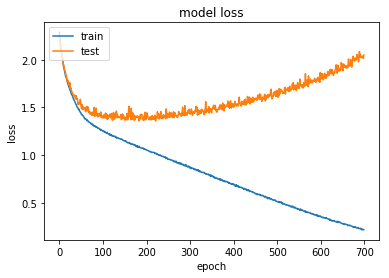

In [57]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/scarlet/Projects/Data Science/Audio Analysis/1/saved_models/Emotion_Voice_Detection_Model.h5 


In [59]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [60]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 44.61%


In [61]:
len(mylist)

2452